In [ ]:
########################################## START OF CODE ##########################################################

In [ ]:
######################################## LOAD IMAGE AND PREPROCESSING ###############################################

In [135]:
import numpy as np
from Load_image import *
a= 16
b= 16
folder_path = "./datasets/recognition/train"
X_train,y_train,X_val,y_val = load_images_from_folder_sep(folder_path,test_size=0.2)
folder_path = "./datasets/recognition/test"
X_test,y_test = load_images_from_folder(folder_path)

list = []
num_class, list = count_class("./datasets/recognition/test")
#Numeric the labels set
def numeric(y):
    label_to_index = {label: i for i, label in enumerate(list)}
    y_numeric = np.array([label_to_index[label] for label in y])
    return y_numeric

y_train_numeric = numeric(y_train)
y_val_numeric = numeric(y_val)
y_test_numeric = numeric(y_test)

print(f"Number of loaded training images: {len(X_train)}") 
print(f"Number of loaded validation images: {len(X_val)}") 
print(f"Number of loaded test images: {len(X_test)}") 
print(f"- Classes include : {list}")
#print(X_train[0][0][0][0])#pixel value at specific point
#x,y,z=np.array(X_train[0]).shape #size of specific picture
#print(x,y,z)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


Number of picture in training class:  000_hatsune_miku 44
Number of picture in validating class:  000_hatsune_miku 11
Number of picture in training class:  001_kinomoto_sakura 105
Number of picture in validating class:  001_kinomoto_sakura 27
Number of picture in training class:  002_suzumiya_haruhi 65
Number of picture in validating class:  002_suzumiya_haruhi 17
Number of picture in training class:  003_fate_testarossa 51
Number of picture in validating class:  003_fate_testarossa 13
Number of picture in training class:  004_takamachi_nanoha 69
Number of picture in validating class:  004_takamachi_nanoha 18
Number of picture in training class:  005_lelouch_lamperouge 48
Number of picture in validating class:  005_lelouch_lamperouge 13
Number of picture in training class:  006_akiyama_mio 47
Number of picture in validating class:  006_akiyama_mio 12
Number of picture in training class:  008_shana 60
Number of picture in validating class:  008_shana 16
Number of picture in training cla

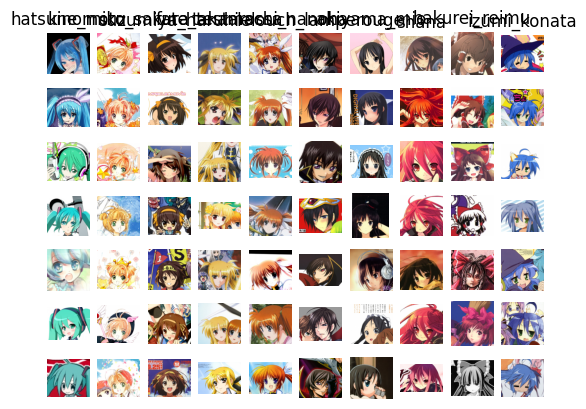

In [136]:
import matplotlib.pyplot as plt
num_classes = num_class
samples_per_class = 7
for y, cls in enumerate(list):
    picture=cls
    picture=picture[4:]
    idxs = np.flatnonzero(y_train_numeric == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img_rgb = cv2.cvtColor(X_train[idx], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(picture)
plt.show()

The datasets before feature-engineering:  (626, 16, 16, 3)
Datasets shape after feature-engineering:  (626, 768)
The datasets before feature-engineering:  (163, 16, 16, 3)
Datasets shape after feature-engineering:  (163, 768)
The datasets before feature-engineering:  (185, 16, 16, 3)
Datasets shape after feature-engineering:  (185, 768)
print a few of the elements:  [169.91054313 174.19009585 184.95207668 168.99680511 172.29552716
 183.67731629 169.68051118 174.04313099 185.4057508  168.82587859]


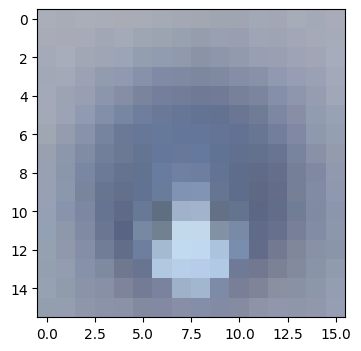

The shape of set after Bias-trick is:  (626, 769)
The shape of set after Bias-trick is:  (163, 769)
The shape of set after Bias-trick is:  (185, 769)


In [137]:
from PreProcess import *
#PreProcessing
X_train= PreProc(X_train,a,b)
X_val= PreProc(X_val,a,b)
X_test= PreProc(X_test,a,b)

#Calc mean values 
mean =CalcMean(X_train,a,b)

#Minus for mean
X_train= Minus_mean(X_train,mean)
X_val= Minus_mean(X_val,mean)
X_test= Minus_mean(X_test,mean)

#Bias trick
X_train = Bias_trick(X_train)
X_val = Bias_trick(X_val)
X_test = Bias_trick(X_test)

In [138]:
###################################### TEST FUNCTION ###############################################################

In [139]:
# In the file linear_classifier_t.py, implement SGD in the function
# LinearClassifier.train() and then run it with the code below.
from linear_classifier_t import *
import time

svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=5e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print ('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 7.990482
iteration 100 / 1500: loss 1.047998
iteration 200 / 1500: loss 1.284183
iteration 300 / 1500: loss 1.268149
iteration 400 / 1500: loss 1.222157
iteration 500 / 1500: loss 1.051104
iteration 600 / 1500: loss 1.072985
iteration 700 / 1500: loss 1.191784
iteration 800 / 1500: loss 1.126736
iteration 900 / 1500: loss 1.123426
iteration 1000 / 1500: loss 1.095460
iteration 1100 / 1500: loss 1.087992
iteration 1200 / 1500: loss 1.055910
iteration 1300 / 1500: loss 1.058695
iteration 1400 / 1500: loss 1.083498
That took 2.440949s


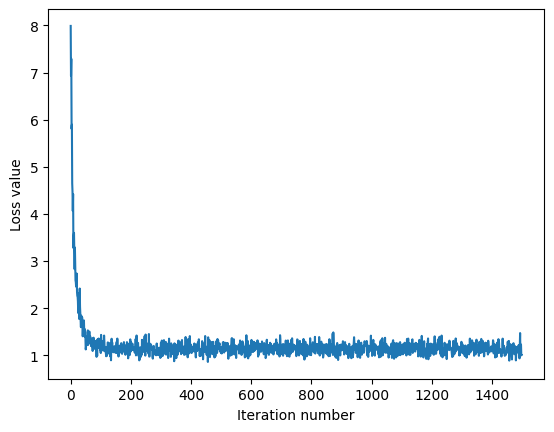

In [140]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number
import matplotlib.pyplot as plt
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [141]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print ('training accuracy: %f' % (np.mean(y_train_numeric == y_train_pred), ))
y_val_pred = svm.predict(X_val)
#print(y_val_numeric.shape)
#print(y_val_pred.shape)
print ('validation accuracy: %f' % (np.mean(y_val_numeric == y_val_pred), ))

training accuracy: 0.900958
validation accuracy: 0.674847


In [142]:
############################################## TRAINING ########################################################

In [143]:
from linear_classifier_t import *
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 2e-7, 3e-7, 8e-7]
regularization_strengths = [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 1e5]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.
tic = time.time()
percentage=0
for lr in learning_rates:
    for r in regularization_strengths:
        print(f"Progress: {percentage:.2f}%", end='\r', flush=True)
        svm = LinearSVM()
        loss_hist = svm.train(X_train, y_train, learning_rate=lr, reg=r,
                      num_iters=2500, verbose=False)
        y_train_pred = svm.predict(X_train)
        #print(y_train_pred.shape)
        y_val_pred = svm.predict(X_val)
        acc_train = np.mean(y_train_numeric == y_train_pred)
        #print(acc_train)
        acc_val = np.mean(y_val_numeric == y_val_pred)
        results[(lr, r)] = (acc_train, acc_val)
        #print (lr, r, acc_train, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
        percentage += 100/36
# print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )
print(f"Progress: 100%", end='\r', flush=True)
print("\nProcess completed!")


# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
toc = time.time()
print ('That took %fp' % ((toc - tic)/60))
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

%
Process completed!
lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.988818 val accuracy: 0.680982
lr 1.000000e-07 reg 2.000000e+04 train accuracy: 0.960064 val accuracy: 0.674847
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.944089 val accuracy: 0.687117
lr 1.000000e-07 reg 4.000000e+04 train accuracy: 0.932907 val accuracy: 0.687117
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.915335 val accuracy: 0.687117
lr 1.000000e-07 reg 6.000000e+04 train accuracy: 0.904153 val accuracy: 0.674847
lr 1.000000e-07 reg 7.000000e+04 train accuracy: 0.873802 val accuracy: 0.674847
lr 1.000000e-07 reg 8.000000e+04 train accuracy: 0.875399 val accuracy: 0.650307
lr 1.000000e-07 reg 1.000000e+05 train accuracy: 0.851438 val accuracy: 0.650307
lr 2.000000e-07 reg 1.000000e+04 train accuracy: 0.985623 val accuracy: 0.699387
lr 2.000000e-07 reg 2.000000e+04 train accuracy: 0.961661 val accuracy: 0.662577
lr 2.000000e-07 reg 3.000000e+04 train accuracy: 0.944089 val accuracy: 0.674847
lr 2.00

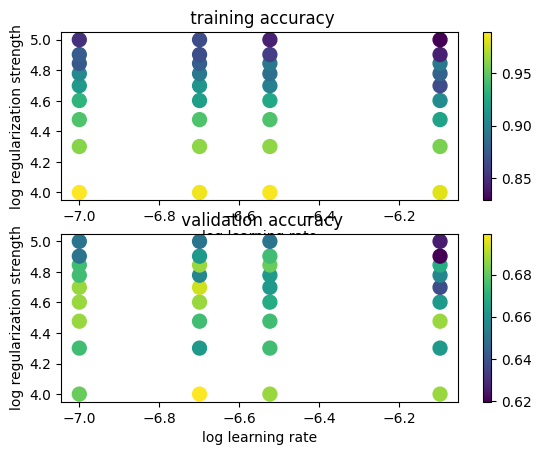

In [144]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title(' training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title(' validation accuracy')
plt.show()

In [145]:
############################### Evaluation part ################################################################

In [146]:
# Evaluate the best svm on test set
#print(X_test.shape)
y_test_pred = best_svm.predict(X_test)
#test_accuracy = np.mean(y_test_numeric == y_test_pred)
#print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

y_test_numeric = np.array(y_test_numeric)
y_test_pred = np.array(y_test_pred)

#print (y_test_numeric)
#print (y_test_pred)
#print (y_test_numeric == y_test_pred)

In [147]:
# calc accuracy 

from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test_numeric, y_test_pred))

accuracy =  0.7027027027027027


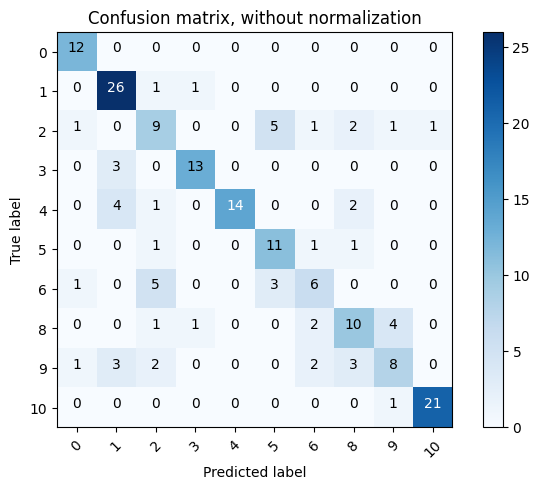

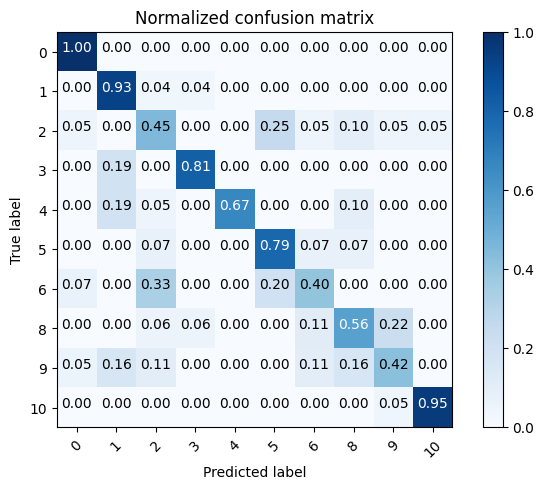

In [148]:
# using confusion matrix

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test_numeric, y_test_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [149]:
#Precision and recall part (micro and macro)

def scan_and_detect(X):
    true_pos=[]
    for i in range(len(y_test_numeric)):
        if (X == y_test_numeric[i]): 
            true_pos.append(i)
    return true_pos

def pr(tp, fp, fn):
    p = float(tp)/(tp + fp)
    r = float(tp)/(tp + fn)
    return (p, r)

def calc_things(X):
    tp,fp,fn = 0,0,0
    true = scan_and_detect(X)
    
    for i in range(len(y_test_pred)):
        if i not in true:
            if y_test_pred[i] == X:
                fn +=1
        if i in true :
            if y_test_pred[i] == X:
                tp +=1
            else :
                fp+=1    
    return tp,fp,fn

TP,FP,FN,p,r = np.zeros(num_class),np.zeros(num_class),np.zeros(num_class),np.zeros(num_class),np.zeros(num_class)
total_tp,total_fp,total_fn,macro_ap,macro_ar=0,0,0,0,0

for i in range(num_class):
    TP[i],FP[i],FN[i] = calc_things(i)
    total_tp += TP[i]
    total_fp += FP[i]
    total_fn += FN[i] 
    p[i],r[i] = pr(TP[i],FP[i],FN[i])
    macro_ap += (p[i])/num_class
    macro_ar += (r[i])/num_class
#print(TP,FP,FN)
#print(total_tp,total_fp,total_fn)
micro_ap = float(total_tp)/(total_tp + total_fp)
micro_ar = float(total_tp)/(total_tp + total_fn)

# print out micro average precision and recall
print('(micro-average precision, micro-average racall) = (%.2f, %.2f)' % (micro_ap, micro_ar))
# print out macro average precision and recall
print('(micro-average precision, micro-average racall) = (%.2f, %.2f)' % (macro_ap, macro_ar))

(micro-average precision, micro-average racall) = (0.70, 0.70)
(micro-average precision, micro-average racall) = (0.70, 0.70)


In [150]:
#F1-score

mirco_F1= 2*(micro_ap*micro_ar)/(micro_ap+micro_ar)
macro_F1= 2*(macro_ap*macro_ar)/(macro_ap+macro_ar)
print('(micro F1-score, macro F1-score) = (',mirco_F1,macro_F1,')')

(micro F1-score, macro F1-score) = ( 0.7027027027027027 0.698696399536549 )


In [151]:
################################# EXAMPLE FOR FEATURE OF EACH CLASS ################################################

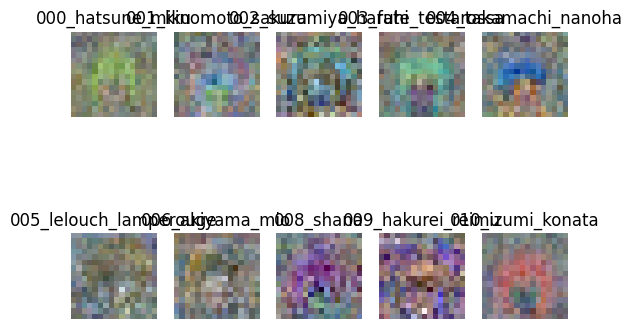

In [152]:
# Visualize the learned weights for each class.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(a, b, 3, 10)
w_min, w_max = np.min(w), np.max(w)

for i in range(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(list[i])

In [153]:
############################## TEST ON RANDOM PICTURE ##############################################################

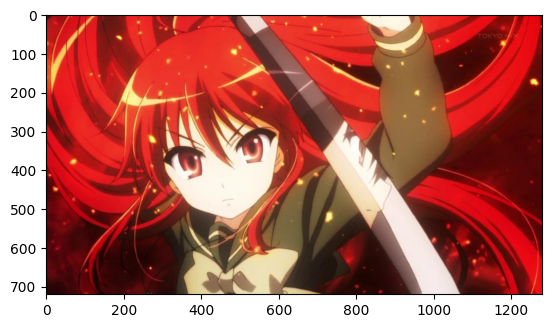

In [176]:
image_path = "./datasets/sample8.jpg" # Replace with the actual path to your image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [177]:
import matplotlib.pyplot as plt

resize_size = (a, b)

img = cv2.resize(img, resize_size)
img = img.astype('float64')  # visualize the mean image
X = np.array(img)
print(X.shape)
X = X.flatten()
print('Training data shape: ', X.shape)

#import matplotlib.pyplot as plt
# first: compute the image mean based on the training data
mean_image = np.mean(X)
#print(mean_image)  # print a few of the elements
#Minus for mean
X -= mean
#Bias trick
img_1 = np.append(X, 1)
print(X.shape)  # , X_dev.shape

y_test_pred = best_svm.predict(img_1)

picture=list[y_test_pred]
picture=picture[4:]

print("the picture is : ",picture)

(16, 16, 3)
Training data shape:  (768,)
(768,)
the picture is :  shana


Image Size (width x height): (159, 317)


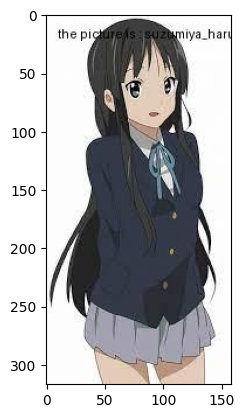

In [174]:
from PIL import Image, ImageDraw, ImageFont

# Open an image file
image = Image.open(image_path)
image_size = image.size

print("Image Size (width x height):", image_size)
# Initialize the drawing context
draw = ImageDraw.Draw(image)

# Choose a font and size
font_size = (image_size[0])/15  # Set your desired font size
font = ImageFont.load_default().font_variant(size=font_size)

# Choose text color
text_color = (0, 0, 5)  # RGB color

# Define the text to be drawn
text_to_draw = ("the picture is : "+picture)

# Specify the position where you want to draw the text
text_position = (10, 10)  # Coordinates (x, y)

# Draw the text on the image
draw.text(text_position, text_to_draw, font=font, fill=text_color)

# Save or display the modified image
image.save("./datasets/result.jpg")  # Replace with the desired output path
img = cv2.imread("./datasets/result.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
image.show()


In [157]:
############################# SAVE AND LOAD WEIGHTS AFTER TRAINING #################################################

In [178]:
# save weights into file and load it
import pickle

with open("weights_data.pkl", "wb") as file:
    pickle.dump(best_svm.W, file)


In [179]:
#load data from file
from linear_classifier_t import *
import pickle



svm = LinearSVM()
with open("weights_data.pkl", "rb") as file:
    svm.W = pickle.load(file)
best_svm=svm
print(best_svm.W)

[[ 1.80488222e-06 -1.89014609e-04 -4.15282908e-05 ... -4.77852464e-05
   1.57878786e-04 -1.40826713e-05]
 [ 2.18181425e-05 -9.87851547e-05 -1.27843723e-05 ...  3.57488299e-05
   2.56221657e-05 -3.33400664e-05]
 [-1.78629936e-05 -1.24409424e-04 -4.19700508e-05 ...  9.09682215e-05
   5.07460893e-05  3.06238568e-05]
 ...
 [-4.71556562e-05  7.31157344e-05  2.15506960e-05 ... -8.65929743e-07
  -2.97334959e-05 -8.27256343e-05]
 [-7.06737785e-05  2.78426033e-05 -2.26898854e-05 ...  2.26871877e-04
   7.64893677e-05 -8.76935112e-06]
 [ 1.33185330e-05 -5.73309902e-06  1.38234873e-05 ...  7.95116326e-07
   1.35116633e-05  6.75468242e-06]]


In [ ]:
############################################### END OF CODE #########################################################